Make a flask app that shows the users a plot of some 2-dimensional data that semi-obviously clusters into k groups. Present the elbow curve plot and the silhoutte curve plot to inform their decision and allow them to enter various values of k that will reproduce the plot based on their chosen k.

Sources:

1. https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
# Generate sample data
np.random.seed(10)
# create raw data
batch_size = 45
X, labels_true = make_blobs(n_samples=3000, centers=5, cluster_std=0.7)

# do kmeans
k_range = np.arange(2,15,1)
elbow_data = []
sil_data = []

for k in k_range:

    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(X)

    elbow_data.append(clusterer.inertia_)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_data.append(silhouette_avg)

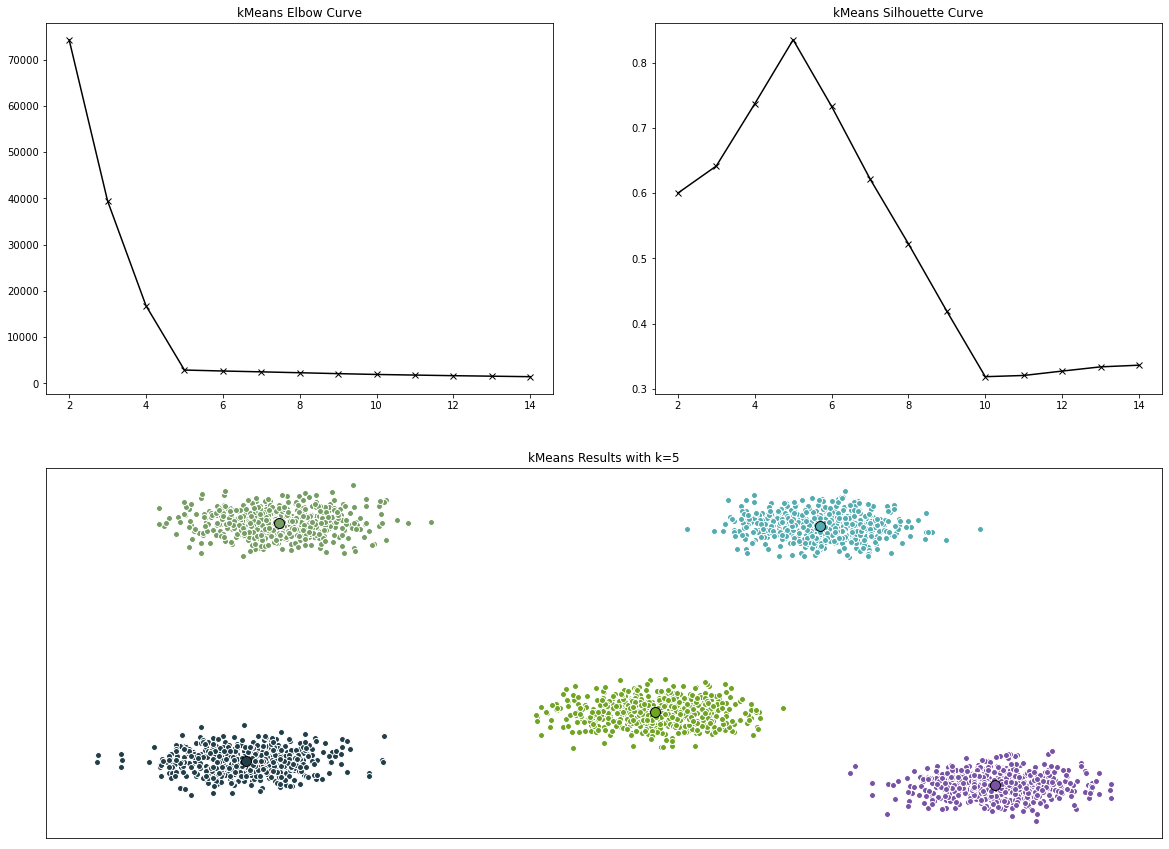

In [3]:
k_chosen = 5

fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

colors = [np.random.rand(3,) for c in range(k_chosen)]

# do chosen_kmeans
clusterer = KMeans(n_clusters=k_chosen)
clusterer.fit(X)
k_means_cluster_centers = clusterer.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

# Raw data plo

for k, col in zip(range(k_chosen), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax3.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='o')
    ax3.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)

ax3.set_title(f'kMeans Results with k={k_chosen}')
ax3.set_xticks(())
ax3.set_yticks(())

# elbow curve
ax1.plot(k_range, elbow_data, 'x-', c='black')
ax1.set_title(f'kMeans Elbow Curve')

# silhoutte curve
ax2.plot(k_range, sil_data, 'x-', c='black')
ax2.set_title(f'kMeans Silhouette Curve')

plt.show()